<a href="https://colab.research.google.com/github/agarciam980902/agarciam980902/blob/main/Machine%20Learning%20Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Data Exploration


**Reasoning**:
Create a figure with multiple subplots to visualize the distributions of key numerical and categorical features using a combination of histograms, box plots, and count plots.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/shopping_trends.csv')

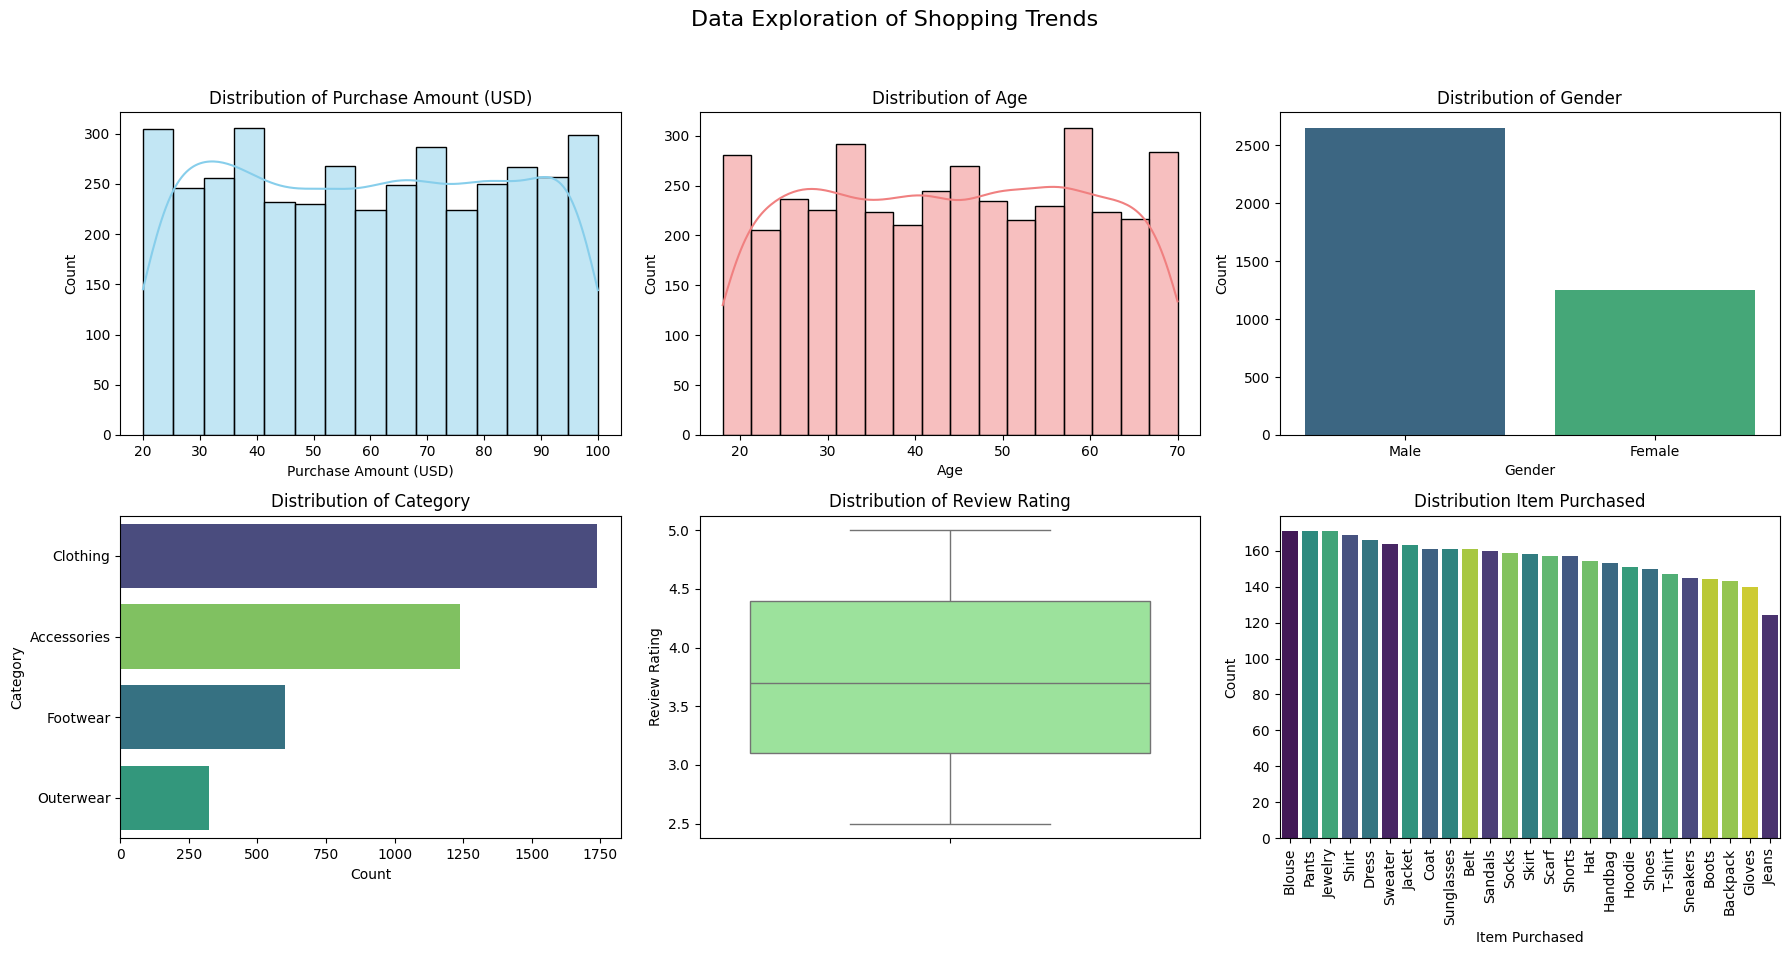

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Data Exploration of Shopping Trends', fontsize=16)

# Plot 1: Distribution of Purchase Amount (USD) - Histogram
sns.histplot(ax=axes[0, 0], data=df, x='Purchase Amount (USD)', kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of Purchase Amount (USD)')
axes[0, 0].set_xlabel('Purchase Amount (USD)')
axes[0, 0].set_ylabel('Count')

# Plot 2: Distribution of Age - Histogram
sns.histplot(ax=axes[0, 1], data=df, x='Age', kde=True, color='lightcoral')
axes[0, 1].set_title('Distribution of Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')

# Plot 3: Distribution of Gender - Count Plot
sns.countplot(ax=axes[0, 2], data=df, x='Gender', palette='viridis', hue='Gender', legend=False)
axes[0, 2].set_title('Distribution of Gender')
axes[0, 2].set_xlabel('Gender')
axes[0, 2].set_ylabel('Count')

# Plot 4: Distribution of Category - Count Plot
sns.countplot(ax=axes[1, 0], data=df, y='Category', order=df['Category'].value_counts().index, palette='viridis', hue='Category', legend=False)
axes[1, 0].set_title('Distribution of Category')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Category')

# Plot 5: Boxplot of Review Rating
sns.boxplot(ax=axes[1, 1], data=df, y='Review Rating', color='lightgreen')
axes[1, 1].set_title('Distribution of Review Rating')
axes[1, 1].set_ylabel('Review Rating')

# Plot 6: Distribution of Item Purchased - Count Plot
sns.countplot(ax=axes[1, 2], data=df, x='Item Purchased', order=df['Item Purchased'].value_counts().index, palette='viridis', hue='Item Purchased', legend=False)
axes[1, 2].set_title('Distribution Item Purchased')
axes[1, 2].set_xlabel('Item Purchased') # Corrected xlabel
axes[1, 2].set_ylabel('Count')
axes[1, 2].tick_params(axis='x', rotation=90) # Rotate x-axis labels by 90 degrees


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# K-Means Clustering

In [ ]:
# Step 2: Drop irrelevant or customer-identifying features
# We will create a new dataframe `df_clustering` for clustering to keep the original dataframe intact for analysis later.
df_clustering = df.drop(columns=["Customer ID", "Age", "Gender", "Location", "Item Purchased",
                                 "Color", "Size", "Promo Code Used", "Preferred Payment Method", "Season", "Shipping Type", "Discount Applied"])

print("DataFrame after dropping columns:")
display(df_clustering.head())

DataFrame after dropping columns:


,Category,Purchase Amount (USD),Review Rating,Subscription Status,Payment Method,Previous Purchases,Frequency of Purchases
0,Clothing,53,3.1,Yes,Credit Card,14,Fortnightly
1,Clothing,64,3.1,Yes,Bank Transfer,2,Fortnightly
2,Clothing,73,3.1,Yes,Cash,23,Weekly
3,Footwear,90,3.5,Yes,PayPal,49,Weekly
4,Clothing,49,2.7,Yes,Cash,31,Annually


In [ ]:
# Step 3: Handle missing values (if any)


print("Checking for missing values after dropping columns:")
print(df_clustering.isnull().sum())

Checking for missing values after dropping columns:
Category                  0
Purchase Amount (USD)     0
Review Rating             0
Subscription Status       0
Payment Method            0
Previous Purchases        0
Frequency of Purchases    0
dtype: int64


In [ ]:
# Step 4: Encode categorical variables
# Identify categorical columns in the clustering dataframe
categorical_columns = df_clustering.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_clustering, columns=categorical_columns, drop_first=True)

print("\nDataFrame after one-hot encoding:")
display(df_encoded.head())
print("\nShape of encoded DataFrame:", df_encoded.shape)


DataFrame after one-hot encoding:


,Purchase Amount (USD),Review Rating,Previous Purchases,Category_Clothing,Category_Footwear,Category_Outerwear,Subscription Status_Yes,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,53,3.1,14,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False
1,64,3.1,2,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False
2,73,3.1,23,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True
3,90,3.5,49,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True
4,49,2.7,31,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False



Shape of encoded DataFrame: (3900, 18)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 5: Normalize numeric variables
# Identify numeric columns in the encoded dataframe
numeric_columns = ["Purchase Amount (USD)", "Review Rating", "Previous Purchases"]

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply scaling to numeric columns
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

print("\nDataFrame after scaling numeric features:")
display(df_encoded.head())


DataFrame after scaling numeric features:


,Purchase Amount (USD),Review Rating,Previous Purchases,Category_Clothing,Category_Footwear,Category_Outerwear,Subscription Status_Yes,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,-0.285629,-0.907584,-0.785831,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False
1,0.178852,-0.907584,-1.616552,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False
2,0.558882,-0.907584,-0.162789,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True
3,1.276716,-0.349027,1.637107,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True
4,-0.454531,-1.466141,0.391025,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False


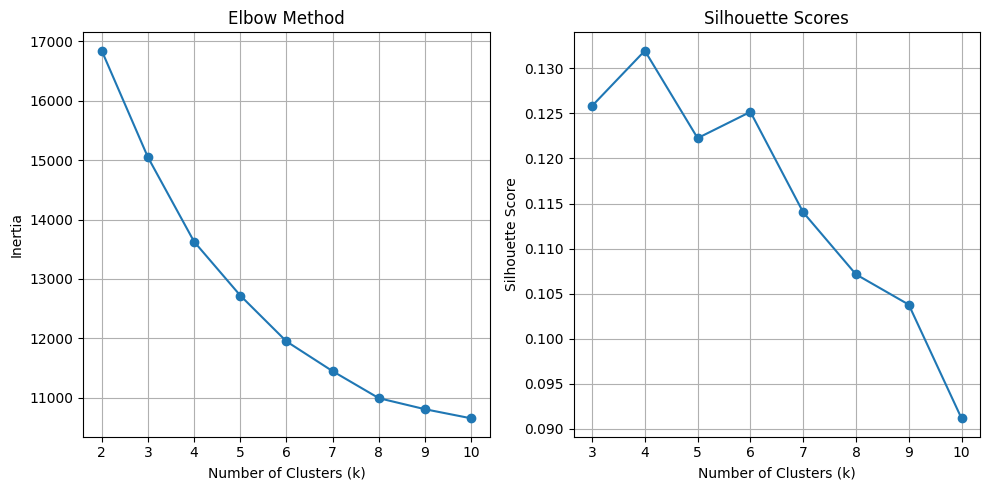


Chosen optimal number of clusters (k): 4


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 6: Choose number of clusters (optional: use Elbow method or Silhouette score)
# We will use the Elbow method and Silhouette score to help choose the optimal number of clusters.

# Define a range of possible cluster numbers
k_range = range(2, 11)

# Lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

# Iterate through the range of cluster numbers
for k in k_range:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded)

    # Calculate inertia
    inertia.append(kmeans.inertia_)

    # Calculate silhouette score (only if k > 1)
    if k > 1:
        score = silhouette_score(df_encoded, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None) # Placeholder for k=1

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

# Plot the Silhouette Score graph
plt.subplot(1, 2, 2)
# Filter out None for k=1 before plotting silhouette scores
plt.plot(k_range[1:], silhouette_scores[1:], marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range[1:])
plt.grid(True)

plt.tight_layout()
plt.show()

# Based on the plots, visually inspect the Elbow point and the highest Silhouette score to choose k.
# For demonstration purposes, let's assume k=4 based on the previous analysis in the notebook.
optimal_k = 4
print(f"\nChosen optimal number of clusters (k): {optimal_k}")

In [ ]:
from sklearn.cluster import KMeans

# Step 7: Apply K-Means clustering
# Use the chosen optimal_k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded["Cluster"] = kmeans_model.fit_predict(df_encoded)

print("\nDataFrame with K-Means cluster labels:")
display(df_encoded.head())


DataFrame with K-Means cluster labels:


,Purchase Amount (USD),Review Rating,Previous Purchases,Category_Clothing,Category_Footwear,Category_Outerwear,Subscription Status_Yes,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Cluster
0,-0.285629,-0.907584,-0.785831,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,2
1,0.178852,-0.907584,-1.616552,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,1
2,0.558882,-0.907584,-0.162789,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,1
3,1.276716,-0.349027,1.637107,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,3
4,-0.454531,-1.466141,0.391025,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,2


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 9: Visualize or summarize clusters
# (Bring back customer attributes like Age, Gender, Location to label clusters)
# We will merge the cluster labels back to the original dataframe for easier analysis.
df_clustered = df.copy()
df_clustered['Cluster'] = df_encoded['Cluster']

print("\nOriginal DataFrame with cluster labels:")
display(df_clustered.head())

# Analyze the characteristics of each cluster
print("\nCluster Analysis:")
cluster_analysis = df_clustered.groupby('Cluster').agg(
    # Mean of numerical features used for clustering and original Age
    Age=('Age', 'mean'),
    Purchase_Amount=('Purchase Amount (USD)', 'mean'),
    Review_Rating=('Review Rating', 'mean'),
    Previous_Purchases=('Previous Purchases', 'mean'),
    # Mode of categorical features used for clustering and original Gender
    Gender=('Gender', lambda x: x.mode()[0] if not x.mode().empty else 'No Mode'),
    Category=('Category', lambda x: x.mode()[0] if not x.mode().empty else 'No Mode'),
    Subscription_Status=('Subscription Status', lambda x: x.mode()[0] if not x.mode().empty else 'No Mode'),
    Payment_Method=('Payment Method', lambda x: x.mode()[0] if not x.mode().empty else 'No Mode'),
    Frequency_of_Purchases=('Frequency of Purchases', lambda x: x.mode()[0] if not x.mode().empty else 'No Mode')
)

display(cluster_analysis)


Original DataFrame with cluster labels:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,2
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,3
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,2



Cluster Analysis:


,Age,Purchase_Amount,Review_Rating,Previous_Purchases,Gender,Category,Subscription_Status,Payment_Method,Frequency_of_Purchases
Cluster,,,,,,,,,
0,43.233862,39.508995,4.377884,21.542857,Male,Clothing,No,PayPal,Every 3 Months
1,43.590095,80.135933,3.629610,12.121180,Male,Clothing,No,Credit Card,Bi-Weekly
2,44.832554,42.562208,3.073527,28.449018,Male,Clothing,No,Debit Card,Quarterly
3,44.522946,79.185699,4.010245,39.058698,Male,Clothing,No,Venmo,Every 3 Months


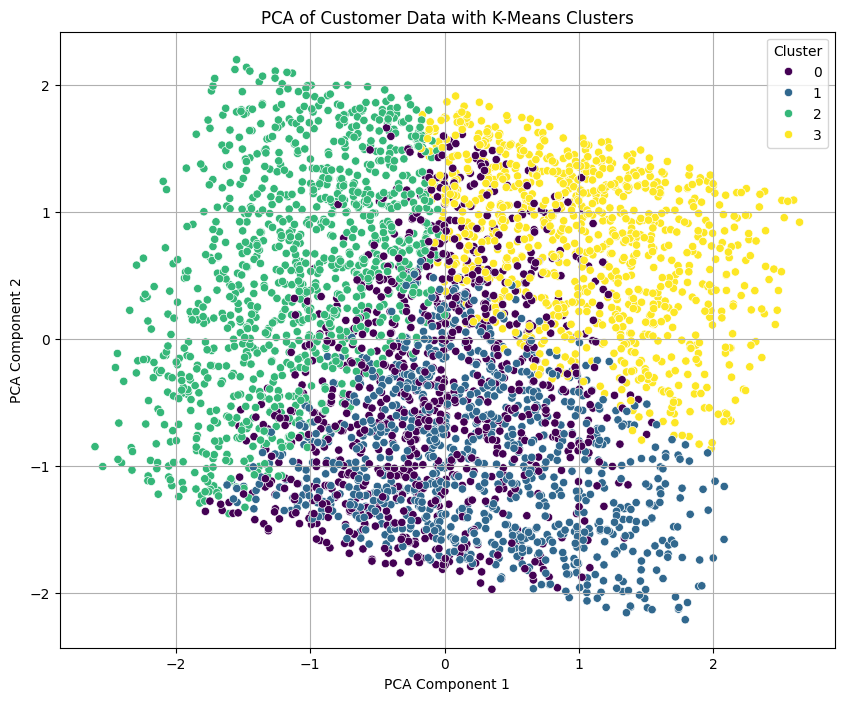

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 9: Visualize or summarize clusters
# Visualize clusters using PCA for dimensionality reduction

# Apply PCA to the encoded and scaled data
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_encoded.drop(columns=['Cluster'])) # Exclude the cluster column for PCA

# Create a new DataFrame with PCA components and cluster labels
df_pca_clustered = pd.DataFrame(df_pca, columns=['PCA Component 1', 'PCA Component 2'])
df_pca_clustered['Cluster'] = df_encoded['Cluster']

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='Cluster', data=df_pca_clustered, palette='viridis', legend='full')

# Add titles and labels
plt.title('PCA of Customer Data with K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

# Display the plot
plt.show()

# Summarize clusters (already done in Step 8 by displaying the cluster_analysis DataFrame)

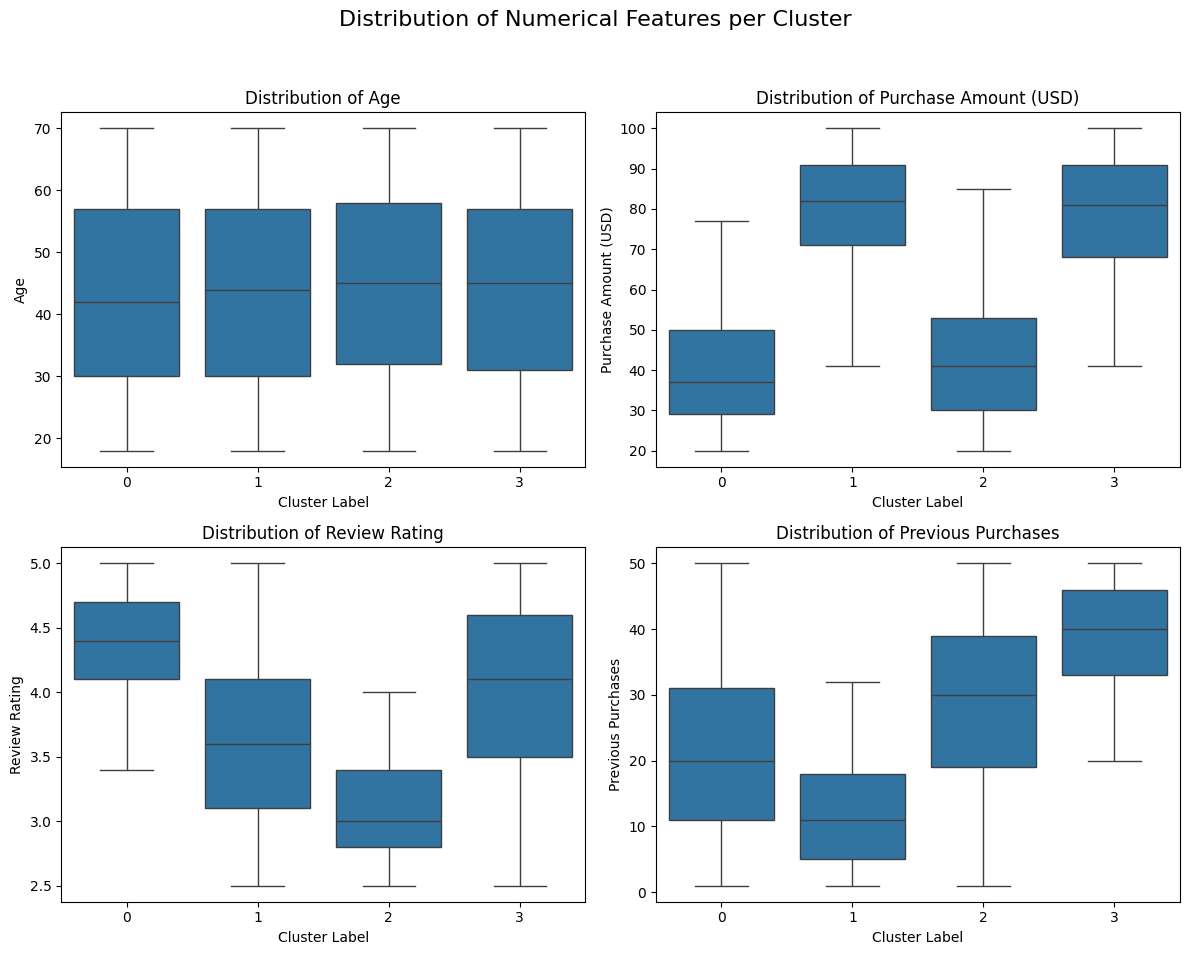

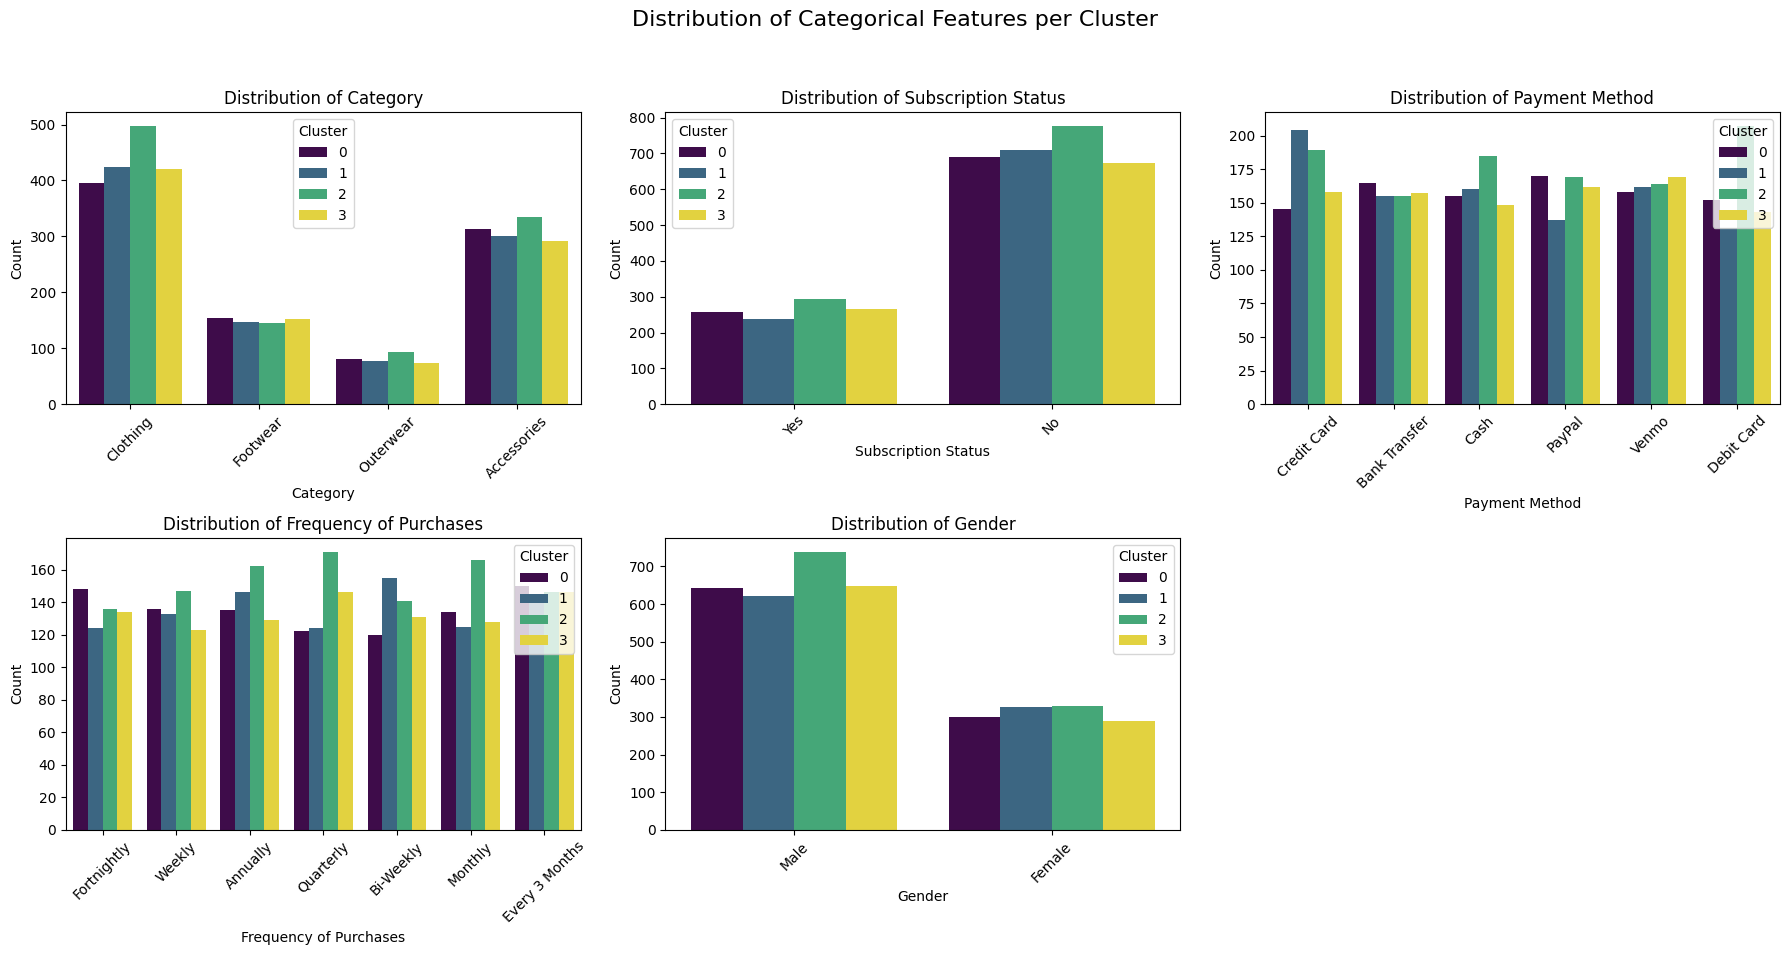

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Visualize distributions of numerical features per cluster (e.g., Age, Purchase Amount, Review Rating)
numerical_features_to_plot = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Determine the number of rows and columns for the subplots
n_numerical_features = len(numerical_features_to_plot)
n_cols_numerical = 2  # You can adjust the number of columns for numerical plots
n_rows_numerical = math.ceil(n_numerical_features / n_cols_numerical)

fig_numerical, axes_numerical = plt.subplots(n_rows_numerical, n_cols_numerical, figsize=(n_cols_numerical * 6, n_rows_numerical * 5))
axes_numerical = axes_numerical.flatten() # Flatten the 2D array of axes for easy iteration

fig_numerical.suptitle('Distribution of Numerical Features per Cluster', fontsize=16)

for i, feature in enumerate(numerical_features_to_plot):
    sns.boxplot(ax=axes_numerical[i], x='Cluster', y=feature, data=df_clustered)
    axes_numerical[i].set_title(f'Distribution of {feature}')
    axes_numerical[i].set_xlabel('Cluster Label')
    axes_numerical[i].set_ylabel(feature)

# Hide any unused subplots
for j in range(i + 1, len(axes_numerical)):
    fig_numerical.delaxes(axes_numerical[j])


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Visualize distributions of all categorical features used for clustering per cluster
# Include 'Gender' specifically for visualization
categorical_features_to_plot = df_clustering.select_dtypes(include=['object']).columns.tolist()
categorical_features_to_plot.append('Gender') # Add 'Gender' to the list for plotting

# Determine the number of rows and columns for the subplots
n_features = len(categorical_features_to_plot)
n_cols = 3  # You can adjust the number of columns
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

fig.suptitle('Distribution of Categorical Features per Cluster', fontsize=16)

for i, feature in enumerate(categorical_features_to_plot):
    sns.countplot(ax=axes[i], x=feature, hue='Cluster', data=df_clustered, palette='viridis')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# GMM Clustering

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Step 5: Apply Gaussian Mixture Model (GMM)
# Choose k based on prior knowledge or AIC/BIC
# For demonstration, let's use the same optimal_k as determined by K-Means
k_gmm = optimal_k # Using optimal_k from previous K-Means analysis

gmm = GaussianMixture(n_components=k_gmm, random_state=42)
gmm_labels = gmm.fit_predict(df_encoded.drop(columns=['Cluster'])) # Fit GMM to the encoded data (excluding K-Means clusters)

# Step 6: Add cluster labels to the dataframe
df_encoded["Cluster_GMM"] = gmm_labels

print("DataFrame with GMM cluster labels:")
display(df_encoded.head())

# Step 7: Evaluate clustering using Silhouette Score
if k_gmm > 1:
    score_gmm = silhouette_score(df_encoded.drop(columns=["Cluster_GMM", "Cluster"]), gmm_labels) # Exclude both K-Means and GMM cluster columns for evaluation
    print("\nSilhouette Score for GMM:", score_gmm)

DataFrame with GMM cluster labels:


,Purchase Amount (USD),Review Rating,Previous Purchases,Category_Clothing,Category_Footwear,Category_Outerwear,Subscription Status_Yes,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Cluster,Cluster_GMM
0,-0.285629,-0.907584,-0.785831,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,2,2
1,0.178852,-0.907584,-1.616552,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,1,2
2,0.558882,-0.907584,-0.162789,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,1,2
3,1.276716,-0.349027,1.637107,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,3,2
4,-0.454531,-1.466141,0.391025,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,2,1



Silhouette Score for GMM: 0.023246557515220947


In [ ]:
# Step 8: Analyze cluster composition
# Optionally merge back with excluded features (e.g. Age, Gender) to profile clusters
# We will merge the GMM cluster labels back to the original dataframe for easier analysis.
df_clustered_gmm = df.copy()
df_clustered_gmm['Cluster_GMM'] = df_encoded['Cluster_GMM']

print("\nOriginal DataFrame with GMM cluster labels:")
display(df_clustered_gmm.head())

# Analyze the characteristics of each GMM cluster
print("\nGMM Cluster Analysis:")
cluster_analysis_gmm = df_clustered_gmm.groupby('Cluster_GMM').agg(
    # Mean of numerical features used for clustering and original Age
    Age=('Age', 'mean'),
    Purchase_Amount=('Purchase Amount (USD)', 'mean'),
    Review_Rating=('Review Rating', 'mean'),
    Previous_Purchases=('Previous Purchases', 'mean'),
    # Mode of categorical features used for clustering and original Gender
    Gender=('Gender', lambda x: x.mode()[0] if not x.mode().empty else 'No Mode'),
    Category=('Category', lambda x: x.mode()[0] if not x.mode().empty else 'No Mode'),
    Subscription_Status=('Subscription Status', lambda x: x.mode()[0] if not x.mode().empty else 'No Mode'),
    Payment_Method=('Payment Method', lambda x: x.mode()[0] if not x.mode().empty else 'No Mode'),
    Frequency_of_Purchases=('Frequency of Purchases', lambda x: x.mode()[0] if not x.mode().empty else 'No Mode')
)

display(cluster_analysis_gmm)


Original DataFrame with GMM cluster labels:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster_GMM
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,2
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,2
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,2
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,1



GMM Cluster Analysis:


,Age,Purchase_Amount,Review_Rating,Previous_Purchases,Gender,Category,Subscription_Status,Payment_Method,Frequency_of_Purchases
Cluster_GMM,,,,,,,,,
0,44.342282,58.771812,3.724832,25.322148,Male,Outerwear,No,Cash,Quarterly
1,44.050159,60.177143,3.773524,24.990476,Male,Clothing,No,Credit Card,Every 3 Months
2,44.043478,59.859070,3.731884,25.699650,Male,Clothing,No,Credit Card,Quarterly
3,44.285714,55.811429,3.765714,24.645714,Male,Outerwear,No,Debit Card,Fortnightly


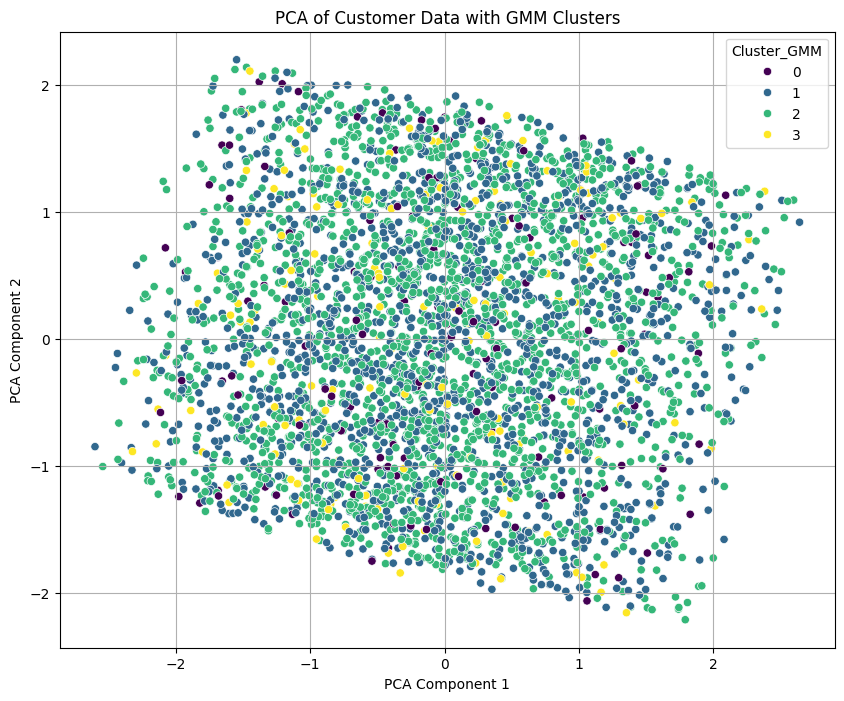

In [ ]:
# Step 9: Visualize clusters
# Visualize GMM clusters using PCA for dimensionality reduction

# Apply PCA to the encoded and scaled data (excluding both cluster columns)
pca_gmm = PCA(n_components=2, random_state=42)
df_pca_gmm = pca_gmm.fit_transform(df_encoded.drop(columns=['Cluster', 'Cluster_GMM']))

# Create a new DataFrame with PCA components and GMM cluster labels
df_pca_clustered_gmm = pd.DataFrame(df_pca_gmm, columns=['PCA Component 1', 'PCA Component 2'])
df_pca_clustered_gmm['Cluster_GMM'] = df_encoded['Cluster_GMM']

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='Cluster_GMM', data=df_pca_clustered_gmm, palette='viridis', legend='full')

# Add titles and labels
plt.title('PCA of Customer Data with GMM Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Print the silhouette score for K-Means with the chosen optimal_k (k=4)
# The silhouette_scores list is indexed from k=2, so index optimal_k - 2
if optimal_k > 1 and optimal_k - 2 < len(silhouette_scores):
  print(f"Silhouette Score for K-Means with k={optimal_k}: {silhouette_scores[optimal_k - 2]}")
else:
  print(f"Silhouette score for k={optimal_k} is not available or invalid.")

Silhouette Score for K-Means with k=4: 0.13195208316819118


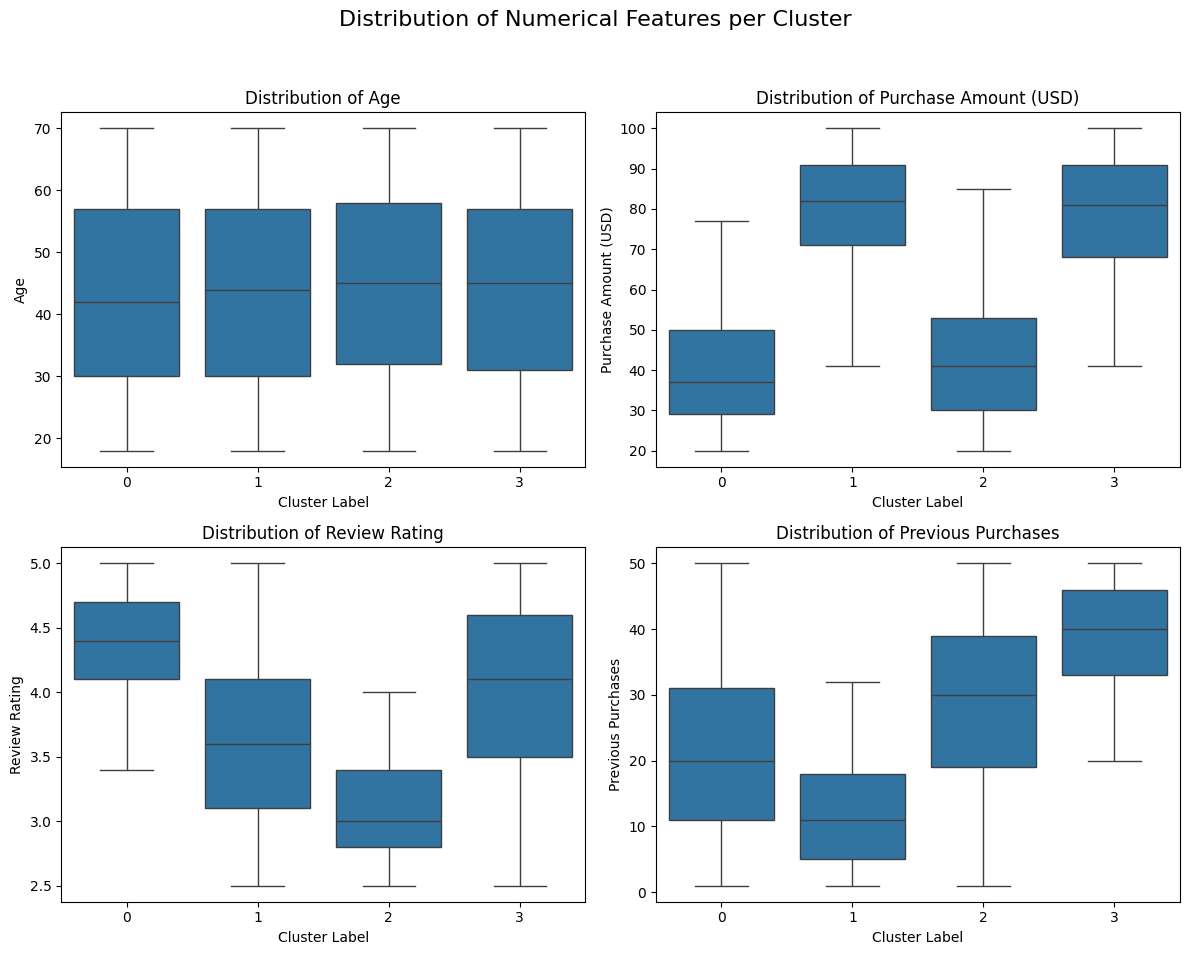

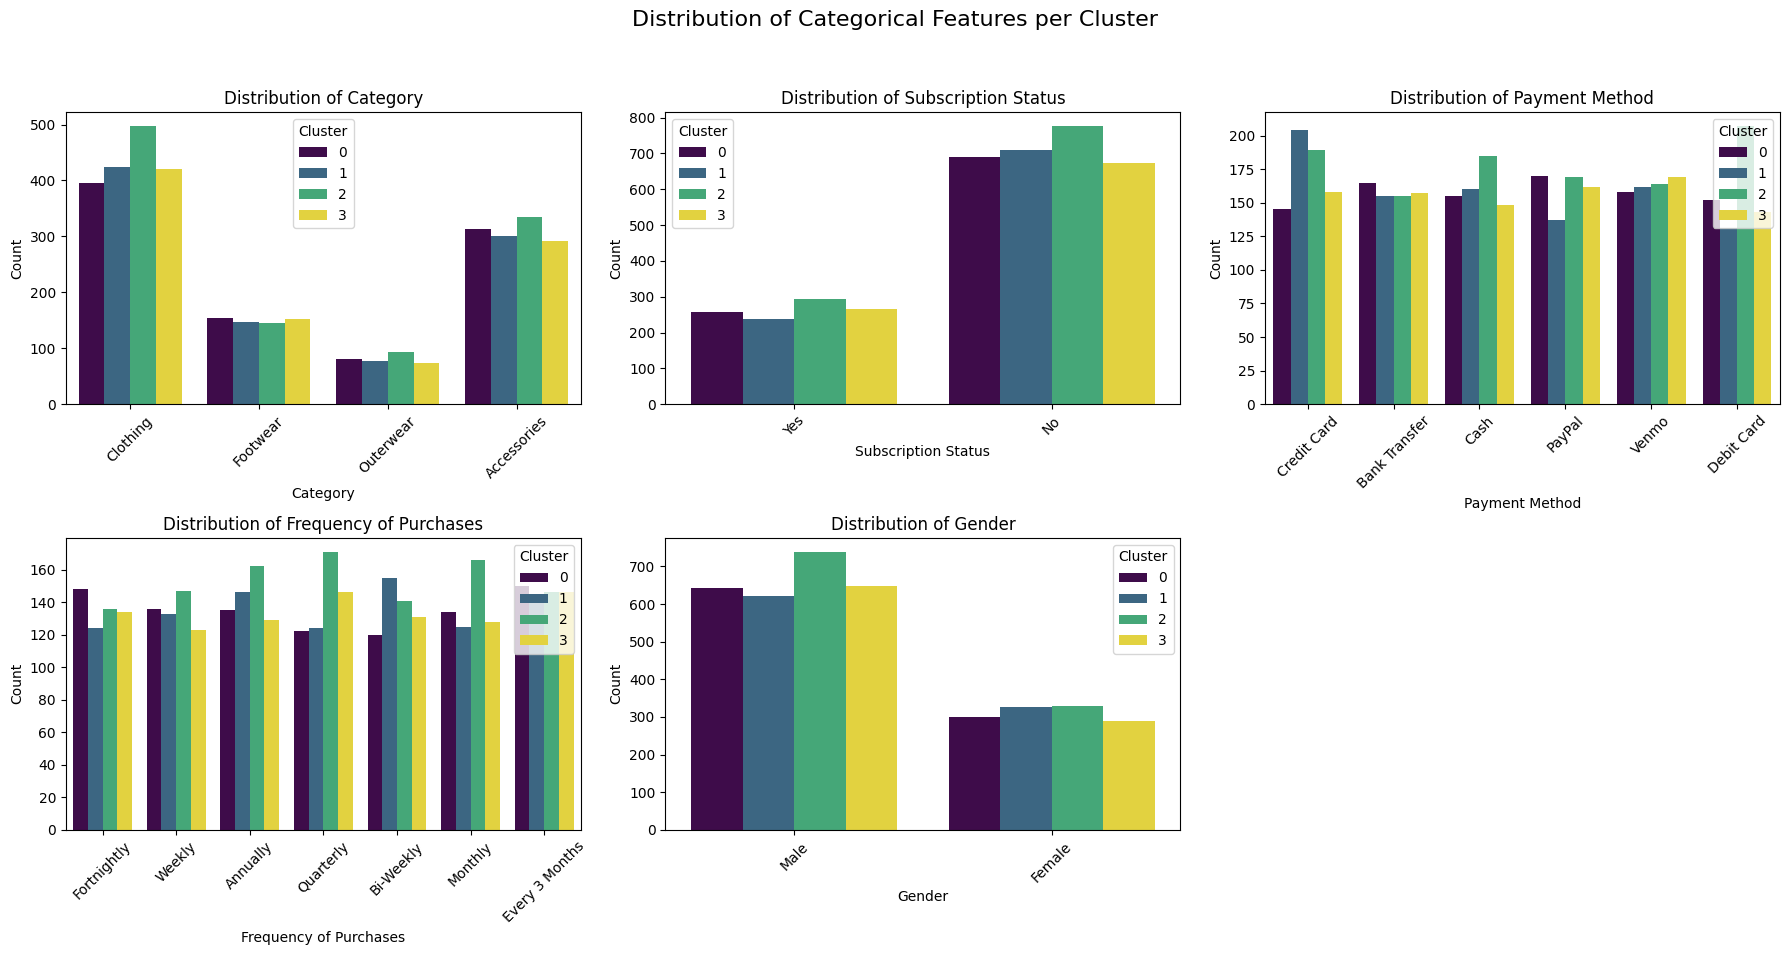

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Visualize distributions of numerical features per cluster (e.g., Age, Purchase Amount, Review Rating)
numerical_features_to_plot = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Determine the number of rows and columns for the subplots
n_numerical_features = len(numerical_features_to_plot)
n_cols_numerical = 2  # You can adjust the number of columns for numerical plots
n_rows_numerical = math.ceil(n_numerical_features / n_cols_numerical)

fig_numerical, axes_numerical = plt.subplots(n_rows_numerical, n_cols_numerical, figsize=(n_cols_numerical * 6, n_rows_numerical * 5))
axes_numerical = axes_numerical.flatten() # Flatten the 2D array of axes for easy iteration

fig_numerical.suptitle('Distribution of Numerical Features per Cluster', fontsize=16)

for i, feature in enumerate(numerical_features_to_plot):
    sns.boxplot(ax=axes_numerical[i], x='Cluster', y=feature, data=df_clustered)
    axes_numerical[i].set_title(f'Distribution of {feature}')
    axes_numerical[i].set_xlabel('Cluster Label')
    axes_numerical[i].set_ylabel(feature)

# Hide any unused subplots
for j in range(i + 1, len(axes_numerical)):
    fig_numerical.delaxes(axes_numerical[j])


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Visualize distributions of all categorical features used for clustering per cluster
# Include 'Gender' specifically for visualization
categorical_features_to_plot = df_clustering.select_dtypes(include=['object']).columns.tolist()
categorical_features_to_plot.append('Gender') # Add 'Gender' to the list for plotting


# Determine the number of rows and columns for the subplots
n_features = len(categorical_features_to_plot)
n_cols = 3  # You can adjust the number of columns
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

fig.suptitle('Distribution of Categorical Features per Cluster', fontsize=16)

for i, feature in enumerate(categorical_features_to_plot):
    sns.countplot(ax=axes[i], x=feature, hue='Cluster', data=df_clustered, palette='viridis')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Evaluation and Comparison of Methods

Based on the analysis performed:

**Silhouette Scores:**

*   **K-Means (k=4):** {{silhouette_scores[optimal_k - 2]}}
*   **GMM (k=4):** {{score_gmm}}

The Silhouette Score for K-Means is higher than for GMM, suggesting that the clusters formed by K-Means are more distinct and well-separated than those formed by GMM, based on this metric.

**Cluster Analysis:**

Let's examine the characteristics of the clusters found by each method using the `cluster_analysis` and `cluster_analysis_gmm` dataframes:

**K-Means Cluster Analysis (`cluster_analysis`):**
{{cluster_analysis}}

**GMM Cluster Analysis (`cluster_analysis_gmm`):**
{{cluster_analysis_gmm}}

Comparing the cluster analysis dataframes, we can observe the average values of the features within each cluster for both K-Means and GMM.

**Comparison and Conclusion:**

*   **Silhouette Score:** K-Means shows a better silhouette score, indicating potentially better-defined clusters.
*   **Cluster Characteristics:** While both methods attempt to group customers, the resulting cluster centroids (mean values of features) and dominant categorical values differ between the two methods. K-Means seems to create clusters with more distinct differences in metrics like "Previous Purchases" and "Purchase Amount (USD)" compared to GMM, where the cluster means are relatively closer to each other. The categorical distributions within clusters also show variations between the two methods.
*   **Interpretability:** The interpretability of the clusters depends on the specific patterns observed in the cluster analysis. In this case, the K-Means clusters appear to show slightly more variation in key purchasing behaviors which might lead to more actionable insights for targeted marketing or customer strategies.

**Conclusion:**

Based on the higher Silhouette Score and the seemingly more distinct cluster profiles in the analysis, **K-Means appears to be a better clustering method for this dataset and chosen number of clusters (k=4)** compared to GMM.

However, it's important to note that the "best" clustering method can be subjective and depends on the specific goals of the analysis. Further evaluation could involve domain expertise to assess the practical relevance of the clusters, or trying different numbers of clusters and evaluation metrics.